In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-churn-prediction-project/CustomerChurnData.xlsx


## Data Description and Data Report

In [2]:
df= pd.read_excel("/kaggle/input/customer-churn-prediction-project/CustomerChurnData.xlsx", sheet_name=1)
df.head(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139.19,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,120.86,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,122.93,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,126.83,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,122.93,Mobile


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [5]:
df.shape

(11260, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [7]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [8]:
df['Churn'].value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

In [9]:
df['Churn'].value_counts()/len(df['Churn'])

Churn
0    0.831616
1    0.168384
Name: count, dtype: float64

In [10]:
df['Payment'].value_counts()

Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      6328
Female    4178
M          376
F          270
Name: count, dtype: int64

In [12]:
df['City_Tier'].value_counts()

City_Tier
1.0    7263
3.0    3405
2.0     480
Name: count, dtype: int64

In [13]:
df['account_segment'].value_counts()

account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: count, dtype: int64

In [14]:
df['Marital_Status'].value_counts()

Marital_Status
Married     5860
Single      3520
Divorced    1668
Name: count, dtype: int64

In [15]:
df['Login_device'].value_counts()

Login_device
Mobile      7482
Computer    3018
&&&&         539
Name: count, dtype: int64

In [16]:
pd.pivot_table(df,values='CC_Agent_Score', index='Marital_Status', columns='City_Tier', aggfunc='mean')

City_Tier,1.0,2.0,3.0
Marital_Status,,,
Divorced,3.228324,3.742424,3.236190
Married,3.051053,3.278146,2.960414
Single,3.035230,2.755102,3.038767


In [17]:
df['Account_user_count'].value_counts()

Account_user_count
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: count, dtype: int64

## Data cleaning 

- Data cleaning steps:

1. Change the data types of columns
2. Missing values treatment
3. Replace incorrect values from featureset (replace unwanted charactors like @ # $ * to appropiate value)

In [18]:
def clean_data(df):
    # Replace gaps forward from the previous valid value in: 'City_Tier'
    df = df.fillna({'City_Tier': df['City_Tier'].ffill()})
    # Replace missing values with the median of each column in: 'CC_Contacted_LY'
    df = df.fillna({'CC_Contacted_LY': df['CC_Contacted_LY'].median()})
    # Replace missing values with the most common value of each column in: 'Payment'
    df = df.fillna({'Payment': df['Payment'].mode()[0]})
    # Replace all instances of "F" with "Female" in column: 'Gender'
    df.loc[df['Gender'].str.lower() == "F".lower(), 'Gender'] = "Female"
    # Replace all instances of "M" with "Male" in column: 'Gender'
    df.loc[df['Gender'].str.lower() == "M".lower(), 'Gender'] = "Male"
    # Replace gaps forward from the previous valid value in: 'Gender'
    df = df.fillna({'Gender': df['Gender'].ffill()})
    # Replace missing values with the median of each column in: 'Service_Score'
    df = df.fillna({'Service_Score': df['Service_Score'].median()})
    # Replace missing values with the most common value of each column in: 'account_segment'
    df = df.fillna({'account_segment': df['account_segment'].mode()[0]})
    # Change column type to object for column: 'Account_user_count'
    df = df.astype({'Account_user_count': 'object'})
    # Replace missing values with the median of each column in: 'CC_Agent_Score'
    df = df.fillna({'CC_Agent_Score': df['CC_Agent_Score'].median()})
    # Replace gaps forward from the previous valid value in: 'Marital_Status'
    df = df.fillna({'Marital_Status': df['Marital_Status'].ffill()})
    # Replace missing values with the median of each column in: 'Complain_ly'
    df = df.fillna({'Complain_ly': df['Complain_ly'].median()})
    # Replace all instances of "&&&&" with "Mobile & Computer" in column: 'Login_device'
    df.loc[df['Login_device'].str.lower() == "&&&&".lower(), 'Login_device'] = "Mobile & Computer"
    # Replace missing values with the most common value of each column in: 'Login_device'
    df = df.fillna({'Login_device': df['Login_device'].mode()[0]})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [19]:
## 'Tenure' column treatment - change values and dtype, missing val
df_clean['Tenure'] = df_clean['Tenure'].replace({'#':'1'})
df_n = df_clean.copy()
df_n['Tenure'] = df_n['Tenure'].fillna(df_clean['Tenure'].median())
df_n['Tenure'] = df_n['Tenure'].astype(int)

In [20]:
## "Account_user_count" column treatment - change values and dtype, missing val
df_n['Account_user_count'] = df_n['Account_user_count'].replace({'@':'4'})
df_n['Account_user_count'] = df_n['Account_user_count'].fillna(df_n['Account_user_count'].median())
df_n['Account_user_count'] = df_n['Account_user_count'].astype(int)

In [21]:
## "rev_per_month" col treatment - change values, and dtype, missing val
df_n['rev_per_month'] = df_n['rev_per_month'].replace({'+':'3'})
df_n['rev_per_month'] = df_n['rev_per_month'].fillna(df_n['rev_per_month'].median())
df_n['rev_per_month'] = df_n['rev_per_month'].astype(int)

In [22]:
## "revv_growth_yoy" col treatment - dtype
df_n['rev_growth_yoy'] = df_n['rev_growth_yoy'].replace({'$':'14'})
df_n['rev_growth_yoy'] = df_n['rev_growth_yoy'].astype(int)

In [23]:
## "coupoun_used_for_payment" col treatment - dtype
df_n['coupon_used_for_payment'] = df_n['coupon_used_for_payment'].replace({'$':'1','#':'1','*':'1'})
df_n['coupon_used_for_payment'] = df_n['coupon_used_for_payment'].astype(int)

In [24]:
## "Day_Since_CC_connect" col - missing values
df_n['Day_Since_CC_connect'] = df_n['Day_Since_CC_connect'].replace({'$':'3'})
df_n['Day_Since_CC_connect'] = df_n['Day_Since_CC_connect'].fillna(df_n['Day_Since_CC_connect'].median())
df_n['Day_Since_CC_connect'] = df_n['Day_Since_CC_connect'].astype(int)

In [25]:
## "cashback" col - missing value
df_n['cashback'] = df_n['cashback'].replace({'$':'155.62'})
df_n['cashback'] = df_n['cashback'].fillna(df_n['cashback'].median())
df_n['cashback'] = df_n['cashback'].astype(float)

In [26]:
## remove accountID column
df_new = df_n.drop(columns=["AccountID"])
df_final = df_new.copy()

- **Outliar treatment of rev_per_month**

In [72]:
# Calculate IQR for each column
Q1 = df_final['rev_per_month'].quantile(0.25)
Q3 = df_final['rev_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter rows using IQR formulas
df_filtered = df_final[~((df_final['rev_per_month'] < lower_bound) | (df_final['rev_per_month'] > upper_bound))]
df_filtered

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.90,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,165.24,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.60,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.90,Computer


### Clean dataset report

In [52]:
# final clean dataframe for further analysis, visualization prep
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11075 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11075 non-null  int64  
 1   Tenure                   11075 non-null  int64  
 2   City_Tier                11075 non-null  float64
 3   CC_Contacted_LY          11075 non-null  float64
 4   Payment                  11075 non-null  object 
 5   Gender                   11075 non-null  object 
 6   Service_Score            11075 non-null  float64
 7   Account_user_count       11075 non-null  int64  
 8   account_segment          11075 non-null  object 
 9   CC_Agent_Score           11075 non-null  float64
 10  Marital_Status           11075 non-null  object 
 11  rev_per_month            11075 non-null  int64  
 12  Complain_ly              11075 non-null  float64
 13  rev_growth_yoy           11075 non-null  int64  
 14  coupon_used_for_payment  11

In [53]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,11075.0,0.167223,0.373192,0.0,0.00,0.00,0.00,1.0
Tenure,11075.0,10.897336,12.835648,0.0,2.00,8.00,16.00,99.0
City_Tier,11075.0,1.657517,0.916308,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11075.0,17.839729,8.809774,4.0,11.00,16.00,23.00,132.0
Service_Score,11075.0,2.901761,0.722276,0.0,2.00,3.00,3.00,5.0
Account_user_count,11075.0,3.703205,1.005109,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11075.0,3.063386,1.373249,1.0,2.00,3.00,4.00,5.0
rev_per_month,11075.0,4.987720,2.771900,1.0,3.00,4.00,7.00,13.0
Complain_ly,11075.0,0.275576,0.446824,0.0,0.00,0.00,1.00,1.0
rev_growth_yoy,11075.0,16.180497,3.753587,4.0,13.00,15.00,19.00,28.0


In [54]:
df_filtered['Churn'].value_counts()

Churn
0    9223
1    1852
Name: count, dtype: int64

In [55]:
df_filtered.describe(include='object').T

,count,unique,top,freq
Payment,11075,5,Debit Card,4618
Gender,11075,2,Male,6667
account_segment,11075,7,Super,4090
Marital_Status,11075,3,Married,5885
Login_device,11075,3,Mobile,7568


In [56]:
df_filtered.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [57]:
# count of unique values in each col
def unique_count(col):
    count = len(df_filtered[col].unique())
    print(f"for {col} column: ", count)
    
for df in list(df_filtered.columns):
    unique_count(df)

for Churn column:  2
for Tenure column:  37
for City_Tier column:  3
for CC_Contacted_LY column:  44
for Payment column:  5
for Gender column:  2
for Service_Score column:  6
for Account_user_count column:  6
for account_segment column:  7
for CC_Agent_Score column:  5
for Marital_Status column:  3
for rev_per_month column:  13
for Complain_ly column:  2
for rev_growth_yoy column:  19
for coupon_used_for_payment column:  17
for Day_Since_CC_connect column:  23
for cashback column:  5630
for Login_device column:  3


In [58]:
# value counts of cols
def value_Counts(col):
    vc = dict(df_filtered[col].value_counts())
    print(f"value counts for each categories of {col}:", vc)

value_Counts('Gender')
value_Counts('Payment')
value_Counts('account_segment')
value_Counts('Marital_Status')
value_Counts('Login_device')

value counts for each categories of Gender: {'Male': 6667, 'Female': 4408}
value counts for each categories of Payment: {'Debit Card': 4618, 'Credit Card': 3446, 'E wallet': 1210, 'Cash on Delivery': 997, 'UPI': 804}
value counts for each categories of account_segment: {'Super': 4090, 'Regular Plus': 3801, 'HNI': 1603, 'Super Plus': 758, 'Regular': 514, 'Regular +': 262, 'Super +': 47}
value counts for each categories of Marital_Status: {'Married': 5885, 'Single': 3523, 'Divorced': 1667}
value counts for each categories of Login_device: {'Mobile': 7568, 'Computer': 2968, 'Mobile & Computer': 539}


## Exploratory Data Analysis and Data Visualization

In [75]:
obj_col = ['Payment','Gender','account_segment','Marital_Status','Login_device']
num_col = [col for col in list(df_filtered.columns) if df_filtered[col].dtype != 'object']

# classification of columns based on cardinality
num_dis_col = [col for col in list(df_filtered.columns) if len(df_filtered[col].unique()) < 10]
num_cont_col = [col for col in list(df_filtered.columns) if len(df_filtered[col].unique()) > 10]

### Univariate analysis of features

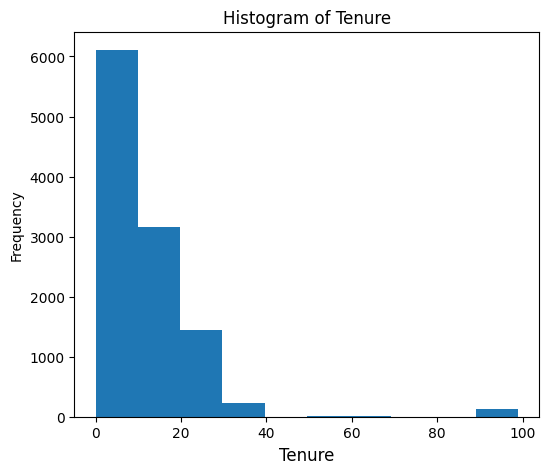

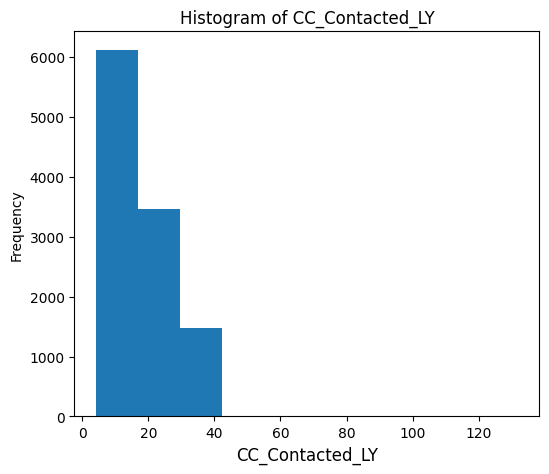

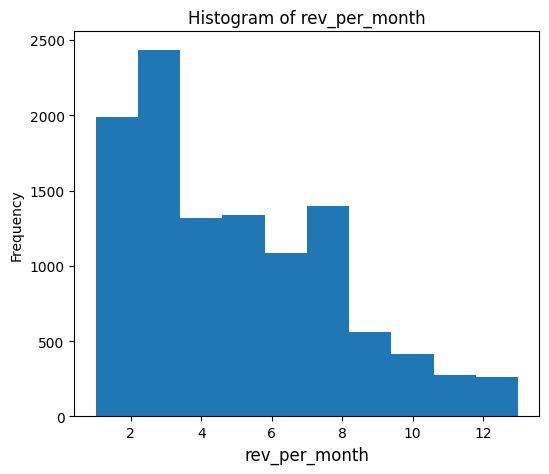

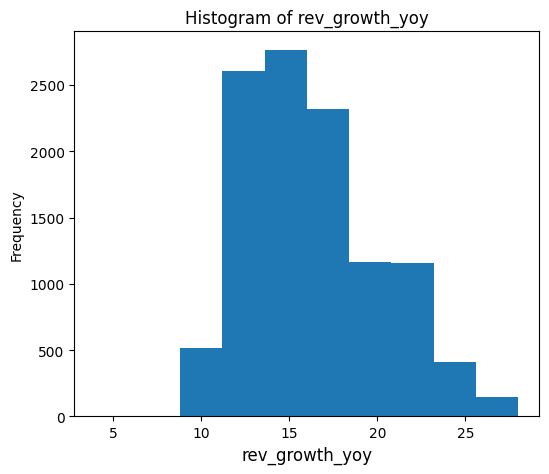

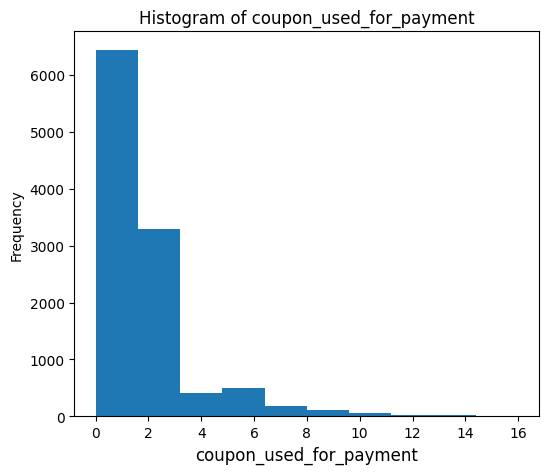

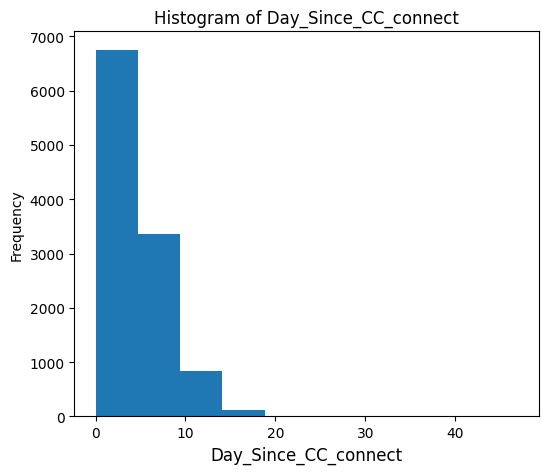

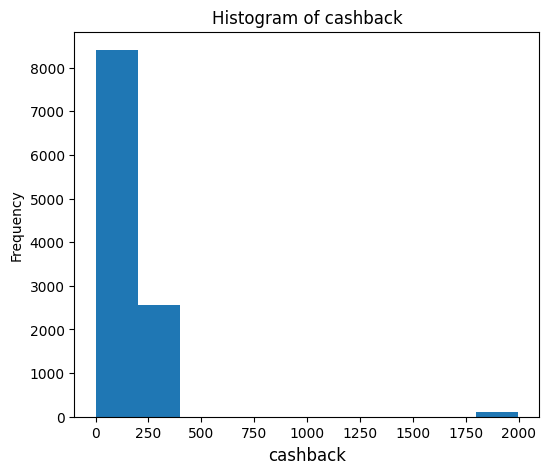

In [76]:
# histogram for continous columns
for col in num_cont_col:
    df_filtered[col].plot.hist(title=f'Histogram of {col}', figsize=(6,5))
    plt.xlabel(f"{col}", fontsize=12)
    plt.show()

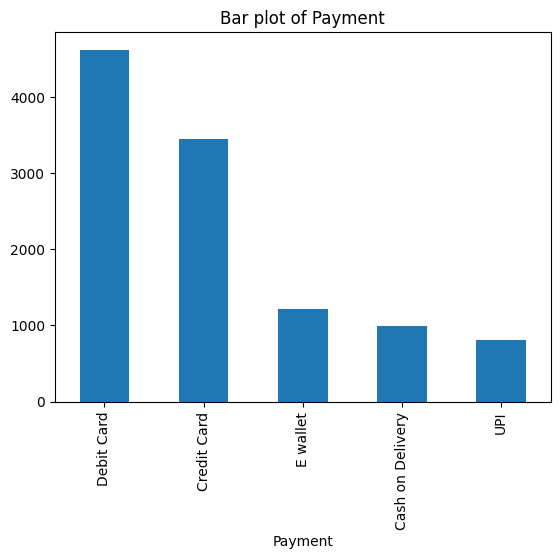

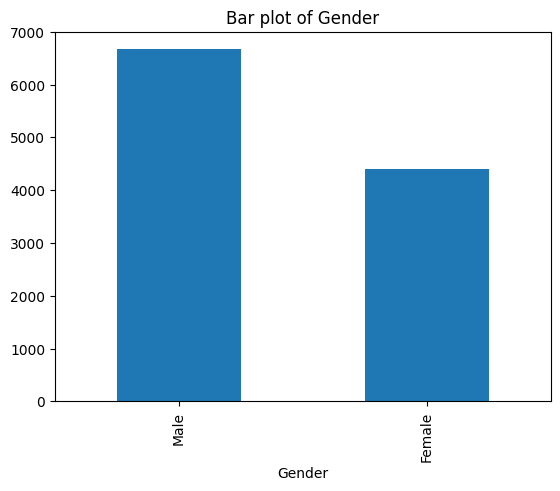

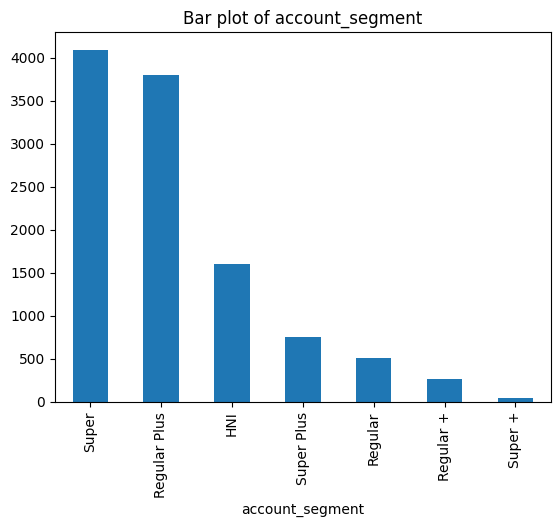

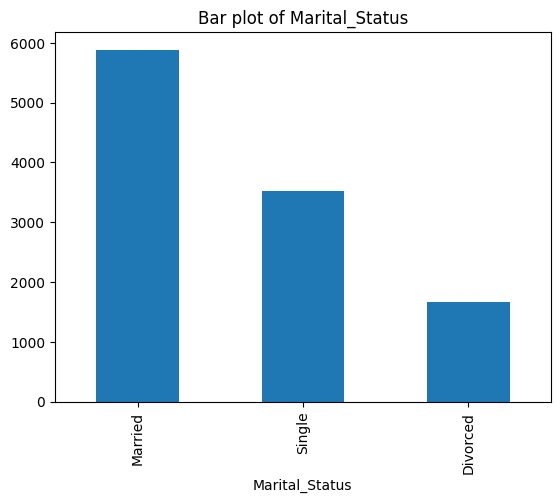

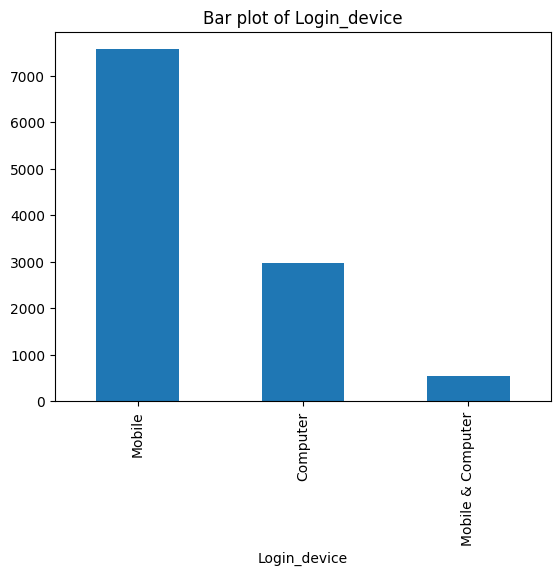

In [77]:
# bar plot of object cols
for col in obj_col:
    df_filtered[col].value_counts().plot.bar(title=f'Bar plot of {col}')
    plt.show()

In [78]:
# bar plot of discreat features


### Bivariate analysis of features

In [ ]:
# histogram with churn col

In [ ]:
# linechart with churn col for categorical cols

### Multivariate analysis of features

###  1. Various pivot tables and plots to find insights that affect the customer churn

In [60]:
pd.pivot_table(df_filtered,values='cashback', index='Marital_Status', columns='Churn', aggfunc='mean')

Churn,0,1
Marital_Status,,
Divorced,204.169188,184.889707
Married,198.786077,187.312770
Single,190.770151,179.312015


<Axes: xlabel='Marital_Status'>

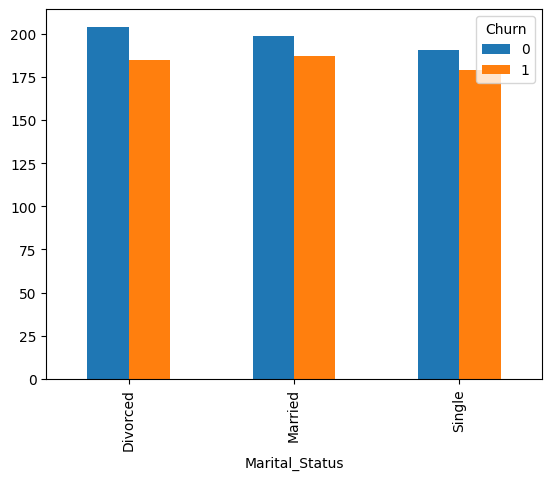

In [61]:
pd.pivot_table(df_filtered,values='cashback', index='Marital_Status', columns='Churn', aggfunc='mean').plot(kind='bar')

In [ ]:
## correlation matrix

## Data Pre-processing and transformations

## Machine Learning Modeling

## Model Evaluation, Tuning and Interpretation

## Business Recommendations